In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from random import random

data_file = "../csv/titanic/train.csv"
dataset = pd.read_csv(data_file,index_col=0)

dataset.describe() 


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
dataset.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
ds = dataset
ds['Sex'] = ds['Sex'].apply(lambda x: 1 if x == 'female' else 0)
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
ds[ds['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [5]:
ds[ds['Cabin'] == 'B28']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [6]:
ds['Embarked'] = ds['Embarked'].apply(lambda x: 'S' if pd.isna(x) else x)
ds['Embarked_num'] = ds['Embarked'].apply(lambda x: -1 if x == 'S' else (0 if x == 'Q' else 1))
ds['Age'] = ds['Age'].apply(lambda x: ds['Age'].mean() if pd.isna(x) else x)
ds['Cabin_bool'] = ds['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

columns_to_drop = ['Ticket', 'Cabin', "Name", "Ticket", "Cabin", "Embarked",'Survived', 'Cabin_bool']
y = ds['Survived']

X_train, X_test, y_train, y_test = train_test_split(ds.drop(columns=columns_to_drop), y, test_size=0.3,
                                                        random_state=42)
X_train.isna().any()

Pclass          False
Sex             False
Age             False
SibSp           False
Parch           False
Fare            False
Embarked_num    False
dtype: bool

In [7]:
lr = LogisticRegressionCV(Cs=[0.1, 1, 3, 5,10,15,20,50,100], cv=7, max_iter=10000)
scaler = StandardScaler()
pipe = Pipeline([
    ('scaler', scaler), 
    ('reg', lr)])
pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



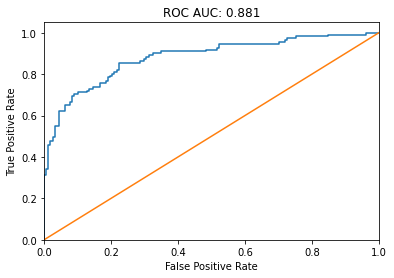

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve

def roc_auc_plot(X_test, y_test, pipe):
    prediction = pipe.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    auc_score = roc_auc_score(y_test, prediction)
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

roc_auc_plot(X_test, y_test, pipe)

In [9]:
from sklearn.svm import SVC

svc = SVC(probability=True)
scaler = StandardScaler()
pipe = Pipeline([
    ('scaler', scaler), 
    ('svm', svc)])
pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       157
           1       0.87      0.67      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



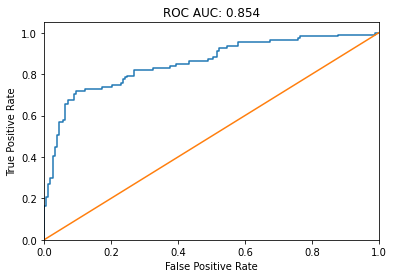

In [10]:
roc_auc_plot(X_test, y_test, pipe)

In [11]:
ds[ds['Age'] < 10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_num,Cabin_bool
PassengerId,,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,349909,21.0750,NaN,S,-1,0
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.00,1,1,PP 9549,16.7000,G6,S,-1,1
17,0,3,"Rice, Master. Eugene",0,2.00,4,1,382652,29.1250,NaN,Q,0,0
25,0,3,"Palsson, Miss. Torborg Danira",1,8.00,3,1,349909,21.0750,NaN,S,-1,0
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",1,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",0,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1,0
832,1,2,"Richards, Master. George Sibley",0,0.83,1,1,29106,18.7500,NaN,S,-1,0
851,0,3,"Andersson, Master. Sigvard Harald Elias",0,4.00,4,2,347082,31.2750,NaN,S,-1,0


In [115]:
data_file = "../csv/titanic/test.csv"
testds = pd.read_csv(data_file,index_col=0)

testds.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [13]:
testds["Fare"].mean()

35.627188489208635

In [14]:
testds['Sex'] = testds['Sex'].apply(lambda x: 1 if x == 'female' else 0)
testds['Embarked'] = testds['Embarked'].apply(lambda x: 'S' if pd.isna(x) else x)
testds['Embarked_num'] = testds['Embarked'].apply(lambda x: -1 if x == 'S' else (0 if x == 'Q' else 1))
testds['Age'] = testds['Age'].apply(lambda x: testds['Age'].mean() if pd.isna(x) else x)
testds['Cabin_bool'] = testds['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
testds['Fare'] = testds['Fare'].apply(lambda x: testds["Fare"].mean() if pd.isna(x) else x)

columns_to_drop = ['Ticket', 'Cabin', "Name", "Ticket", "Cabin", "Embarked"]


testds.drop(columns=columns_to_drop).isna().any()

Pclass          False
Sex             False
Age             False
SibSp           False
Parch           False
Fare            False
Embarked_num    False
Cabin_bool      False
dtype: bool

In [15]:
ds[ds['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_num,Cabin_bool
PassengerId,,,,,,,,,,,,,


In [16]:
# result = pd.DataFrame(data=zip(testds.index, pipe.predict(testds.drop(columns=columns_to_drop))),
                
#                   columns=['PassengerId','Survived'])
# result.set_index('PassengerId')
# result.to_csv('../csv/titanic/result.csv', index=False)

ValueError: X has 8 features, but this StandardScaler is expecting 7 features as input.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[5, 10, 15, 25, 35, 50, 100],
    'max_depth':[ 5, 7, 8, 9, 10, 12, 15, 20, 30],
    'max_features':[
        'auto', 
        'sqrt',
        'log2'
    ]
}

rfCV = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid= params,
    n_jobs=-1,
    verbose=1
)

rfCV.fit(X_train, y_train)
print(classification_report(y_test, rfCV.predict(X_test)))

Fitting 5 folds for each of 189 candidates, totalling 945 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:   10.1s


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.71      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



[Parallel(n_jobs=-1)]: Done 945 out of 945 | elapsed:   16.6s finished


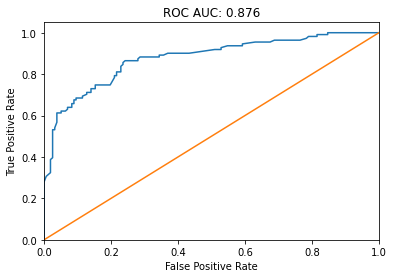

In [26]:
roc_auc_plot(X_test, y_test, rfCV)

<AxesSubplot:>

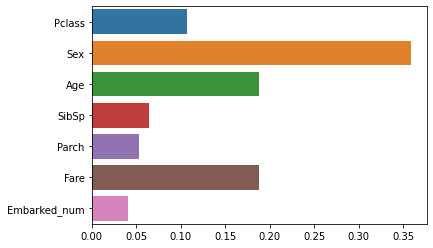

In [36]:
sns.barplot(x=rfCV.best_estimator_.feature_importances_, y = X_train.columns)

In [27]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_num,Cabin_bool
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,-1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,-1,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,-1,0


<AxesSubplot:>

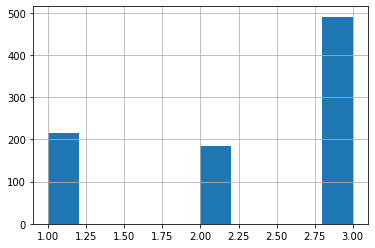

In [28]:
dataset['Pclass'].hist()

<AxesSubplot:>

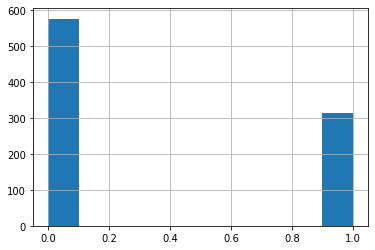

In [30]:
dataset['Sex'].hist()

<AxesSubplot:>

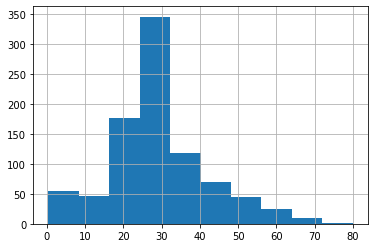

In [31]:
dataset['Age'].hist()

In [32]:
dataset['Age'].isna().any()

False

<AxesSubplot:>

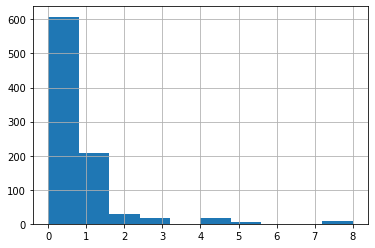

In [33]:
dataset['SibSp'].hist()

<AxesSubplot:>

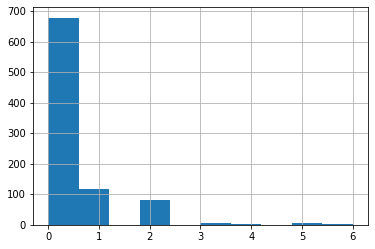

In [34]:
dataset['Parch'].hist()

<AxesSubplot:>

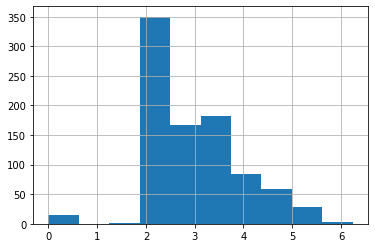

In [45]:
np.log(ds['Fare'] + 1).hist()

<AxesSubplot:>

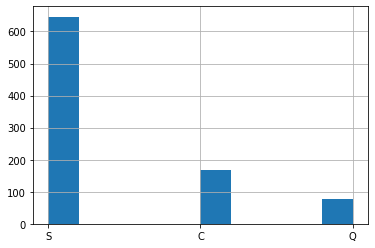

In [46]:
ds['Embarked'].hist()

In [162]:
ds = dataset.copy()

In [163]:
ds = pd.get_dummies(ds, prefix='P_class_', columns=['Pclass'],drop_first=True)
ds = pd.get_dummies(ds, prefix='Sex_', columns=['Sex'],drop_first=True)
ds['Sib_sp_num'] = ds['SibSp'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2)
ds['Parch_num'] = ds['Parch'].apply(lambda x: x if x < 3 else 3)
ds['Fare_log'] = np.log(ds['Fare'] + 1)
ds = pd.get_dummies(ds, prefix='Embarked_', columns=['Embarked'],drop_first=True)
ds['Cabin_bool'] = ds['Cabin'].isna()

In [93]:
ds

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,P_class__2,P_class__3,Sex__male,Sib_sp_num,Parch_num,Fare_log,Embarked__Q,Embarked__S,Cabin_bool
PassengerId,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,1,0,2.110213,0,1,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,4.280593,0,0,False
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,2.188856,0,1,True
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,0,3.990834,0,1,False
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,0,2.202765,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,0,0,2.639057,0,1,True
888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,0,0,3.433987,0,1,False
889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,1,2,3.196630,0,1,True


In [164]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Survived']
y = ds['Survived']

In [133]:
ds.isna().any()

Survived       False
Name           False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
P_class__2     False
P_class__3     False
Sex__male      False
Sib_sp_num     False
Parch_num      False
Fare_log       False
Embarked__Q    False
Embarked__S    False
Cabin_bool     False
dtype: bool

In [168]:
ds['Age'] = ds['Age'].apply(lambda x: x if not np.isnan(x) else ds['Age'].mean())

In [169]:
X_train, X_test, y_train, y_test = train_test_split(ds.drop(columns=columns_to_drop), y, test_size=0.3,
                                                        random_state=42)

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[5, 10, 15, 25, 35, 50, 100],
    'max_depth':[3, 5, 7, 8, 9, 10, 12, None],
    'max_features':[
        'auto', 
        'sqrt',
        'log2'
    ]
}

rfCV = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid= params,
    n_jobs=-1,
    verbose=1
)

rfCV.fit(X_train, y_train)
print(classification_report(y_test, rfCV.predict(X_test)))

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 825 out of 840 | elapsed:   12.9s remaining:    0.2s


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.67      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:   13.3s finished


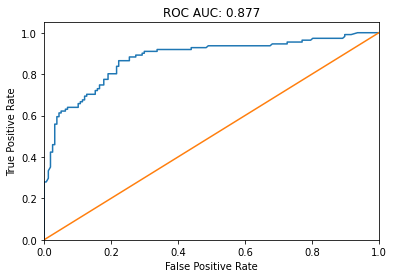

In [172]:
roc_auc_plot(X_test, y_test, rfCV)

In [124]:
data_file = "../csv/titanic/test.csv"
testds = pd.read_csv(data_file,index_col=0)

In [125]:
testds = pd.get_dummies(testds, prefix='P_class_', columns=['Pclass'],drop_first=True)
testds = pd.get_dummies(testds, prefix='Sex_', columns=['Sex'],drop_first=True)
testds['Sib_sp_num'] = testds['SibSp'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2)
testds['Parch_num'] = testds['Parch'].apply(lambda x: x if x < 3 else 3)
testds['Fare'] = testds['Fare'].apply(lambda x: 0 if np.isnan(x) else x)
testds['Fare_log'] = np.log(testds['Fare'] + 1)
testds = pd.get_dummies(testds, prefix='Embarked_', columns=['Embarked'],drop_first=True)
testds['Cabin_bool'] = testds['Cabin'].isna()
testds['Age'] = testds['Age'].apply(lambda x: testds['Age'].median() if np.isnan(x) else x)
columns_to_drop = ['Name', 'Ticket', 'Cabin',  'Cabin']

In [126]:
testds.isna().any()

Name           False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
P_class__2     False
P_class__3     False
Sex__male      False
Sib_sp_num     False
Parch_num      False
Fare_log       False
Embarked__Q    False
Embarked__S    False
Cabin_bool     False
dtype: bool

In [127]:
result = pd.DataFrame(data=zip(testds.index, rfCV.predict(testds.drop(columns=columns_to_drop))),
                
                  columns=['PassengerId','Survived'])
result.set_index('PassengerId')
result.to_csv('../csv/titanic/result.csv', index=False)